## Counting Equivalent Hypergraphs

- Given $n$ and $m$,
- find $\displaystyle\max_{Q \in \mathbb{N}_0^{n \times n}} |\{A \in \{0,1\}^{n \times m}: A A^T=Q\}|$
- up to $A$'s isomorphism.
- The following code considers only column permutations of $A$.

Result: https://docs.google.com/spreadsheets/d/1DPg2MkU5N3bM_9chUZiZuICU-csl0jzkUSxduylmN5Y/edit?usp=sharing

In [61]:
import numpy as np
import pandas as pd
import hypernetx as hnx
from collections import defaultdict

In [62]:
def weighted_clique_expansion(A: np.matrix):
    return A @ A.T

def line_graph(A: np.matrix):
    return A.T @ A

In [63]:
def get_bit(x: int, i: int) -> int:
    return (x >> i) & 1

def get_adj(n: int, m: int, index: int) -> np.matrix:
    assert n * m < 64 and 0 <= index < (1 << n * m)

    return np.matrix([[get_bit(index, j * n + i) for j in range(m)] for i in range(n)])

In [64]:
def next_perm(n: int, m: int, index: int):
    if index + 1 == 1 << (n * m):
        return -1

    # columns
    cols = [(index >> (n * j)) % (1 << n) for j in range(m)]
    j = m - 1
    while j >= 1:
        if cols[j - 1] != cols[j]:
            break
        index -= cols[j] << (n * j)
        j -= 1
    return index + (1 << (n * j))

In [65]:
# sanity check
# ind = 0
# while ind >= 0:
#     print(get_adj(2, 3, ind))
#     ind = next_perm(2, 3, ind)

In [66]:
# matrix to string
def m2s(A: np.matrix) -> str:
    return ' '.join(''.join(str(A[i, j]) for j in range(A.shape[1])) for i in range(A.shape[0]))

In [67]:
def get_equiv_wce(n: int, m: int):
    ret = defaultdict(list)
    index = 0
    
    while index >= 0:
        A = get_adj(n, m, index)
        W = weighted_clique_expansion(A)
        ret[m2s(W)] += [index]
        index = next_perm(n, m, index)
    return ret

In [68]:
def visualize_adj(A: np.matrix):
    a = {}
    for i in range(A.shape[1]):
        s = np.nonzero(A[:,i])[0].tolist()
        if s:
            a[f'e{i}'] = s
    H = hnx.Hypergraph(a)
    hnx.drawing.draw(H)

In [69]:
def get_max_num_wce(n, m):
    max_val = -1
    max_wc = None

    d = get_equiv_wce(n, m)
    for a in d:
        sz = len(d[a])
        if sz > max_val:
            max_val = sz
            max_wc = a
    # max value, max weighted clique expansion, examples (at most 10)
    return max_val, max_wc, d[max_wc][:10]

## $n=2$

In [79]:
for m in range(2, 11):
    print('m=', m, get_max_num_wce(2, m))

m= 2 (1, '00 00', [0])
m= 3 (1, '00 00', [0])
m= 4 (1, '00 00', [0])
m= 5 (1, '00 00', [0])
m= 6 (1, '00 00', [0])
m= 7 (1, '00 00', [0])
m= 8 (1, '00 00', [0])
m= 9 (1, '00 00', [0])
m= 10 (1, '00 00', [0])


## $n=3$

In [81]:
for m in range(2, 11):
    print('m=', m, get_max_num_wce(3, m))

m= 2 (1, '000 000 000', [0])
m= 3 (1, '000 000 000', [0])
m= 4 (2, '211 121 112', [238, 679])
m= 5 (2, '211 121 112', [238, 679])
m= 6 (2, '211 121 112', [238, 679])
m= 7 (2, '211 121 112', [238, 679])
m= 8 (3, '422 242 224', [113526, 342391, 2435391])
m= 9 (3, '422 242 224', [113526, 342391, 2435391])
m= 10 (3, '422 242 224', [113526, 342391, 2435391])


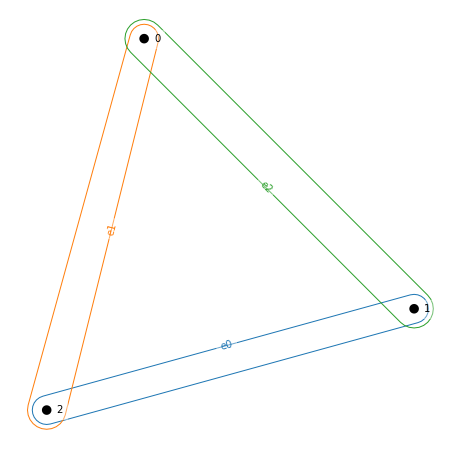

In [82]:
visualize_adj(get_adj(3, 4, 238))

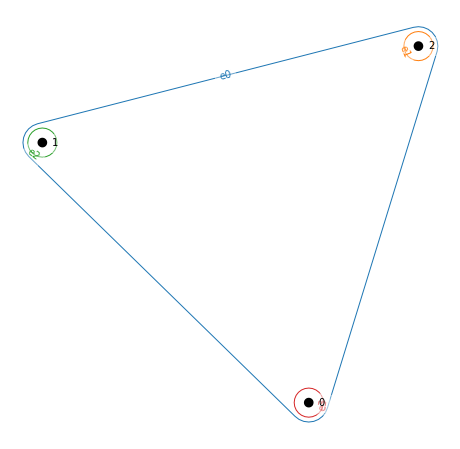

In [83]:
visualize_adj(get_adj(3, 4, 679))

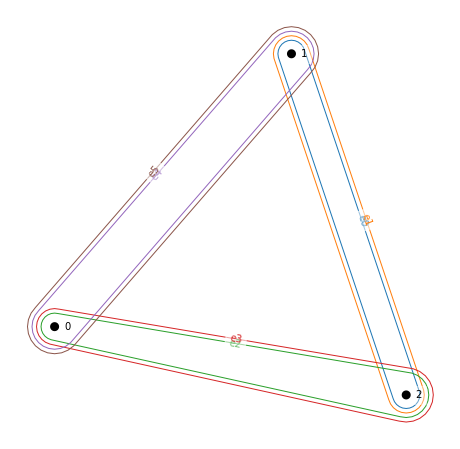

In [85]:
visualize_adj(get_adj(3, 8, 113526))

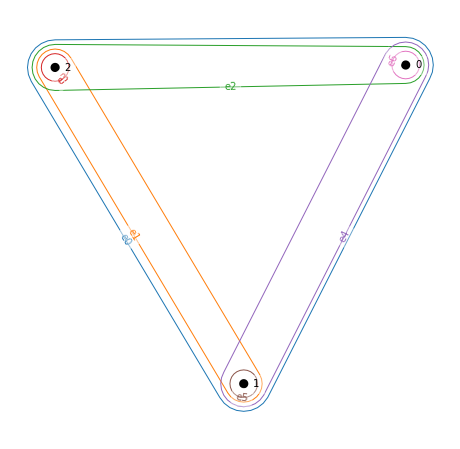

In [86]:
visualize_adj(get_adj(3, 8, 342391))

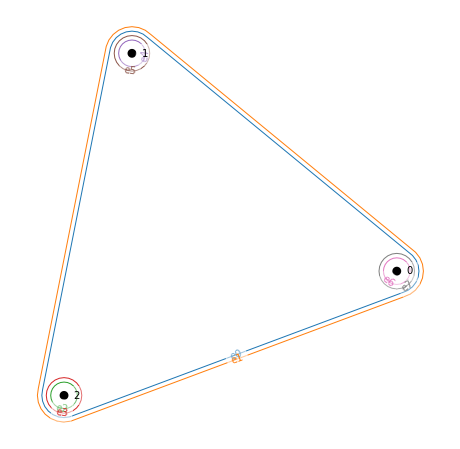

In [87]:
visualize_adj(get_adj(3, 8, 2435391))

## $n=4$

In [88]:
for m in range(2, 11):
    print('m=', m, get_max_num_wce(4, m))

m= 2 (1, '0000 0000 0000 0000', [0])
m= 3 (1, '0000 0000 0000 0000', [0])
m= 4 (2, '2110 1210 1120 0000', [854, 4679])
m= 5 (2, '2110 1210 1120 0000', [854, 4679])
m= 6 (3, '3111 1311 1120 1102', [218778, 1197978, 1201803])
m= 7 (5, '3111 1311 1131 1113', [3500460, 19167660, 19228860, 20211885, 36984990])
m= 8 (10, '4222 2422 2242 2224', [23571405, 39295950, 55024350, 56003550, 306678750, 56007375, 306682575, 307661775, 323390175, 591759855])
m= 9 (10, '4222 2422 2242 2224', [23571405, 39295950, 55024350, 56003550, 306678750, 56007375, 306682575, 307661775, 323390175, 591759855])
m= 10 (11, '4222 2422 2242 2226', [2006559436, 6031977421, 10058505166, 14085036766, 14336691166, 78509542366, 14336694991, 78509546191, 78761200591, 82787732191])


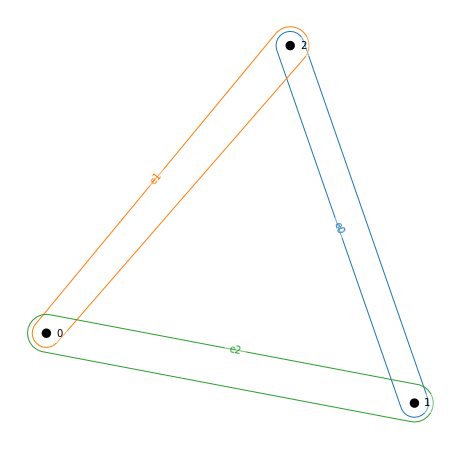

In [89]:
visualize_adj(get_adj(4, 4, 854))

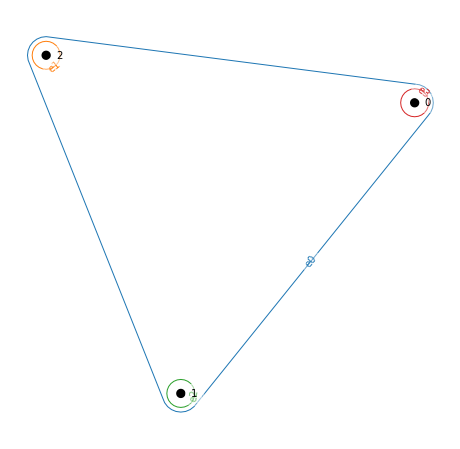

In [90]:
visualize_adj(get_adj(4, 4, 4679))

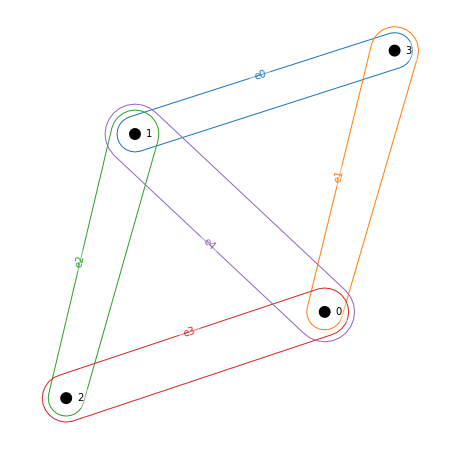

In [91]:
visualize_adj(get_adj(4, 6, 218778))

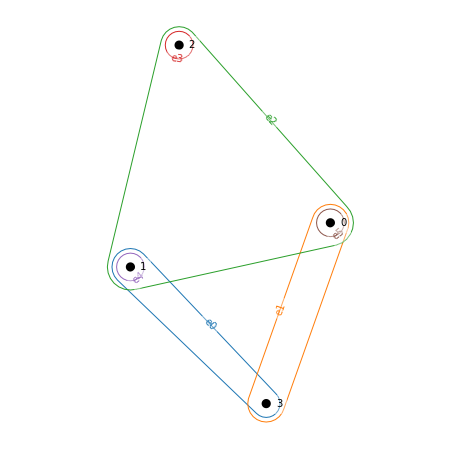

In [92]:
visualize_adj(get_adj(4, 6, 1197978))

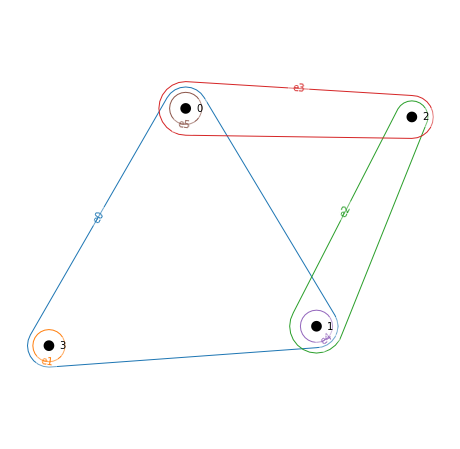

In [96]:
visualize_adj(get_adj(4, 6, 1201803))

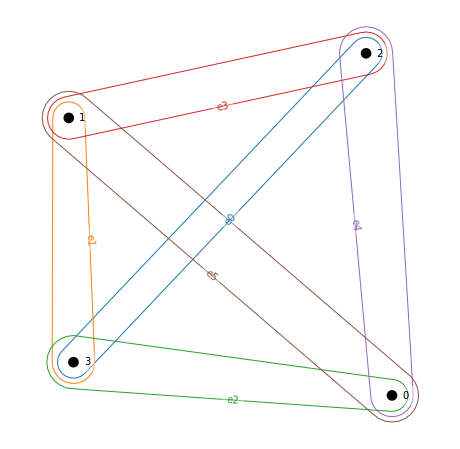

In [97]:
visualize_adj(get_adj(4, 7, 3500460))

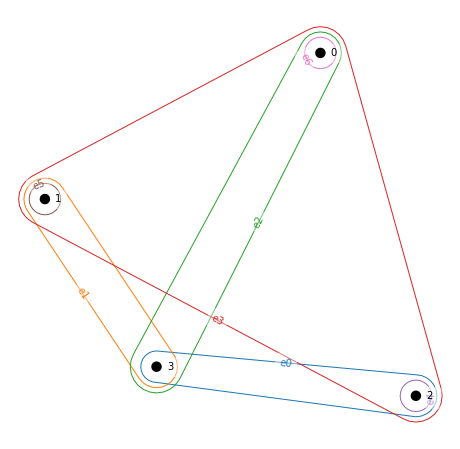

In [103]:
visualize_adj(get_adj(4, 7, 19167660))

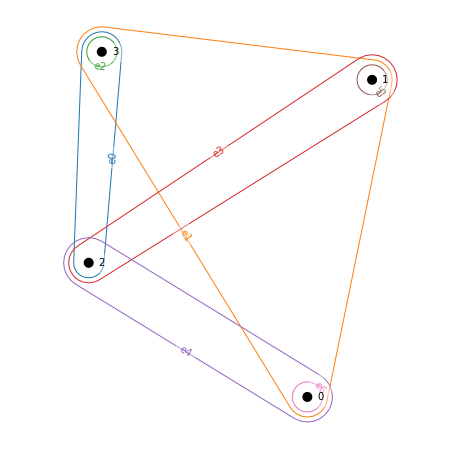

In [105]:
visualize_adj(get_adj(4, 7, 19228860))

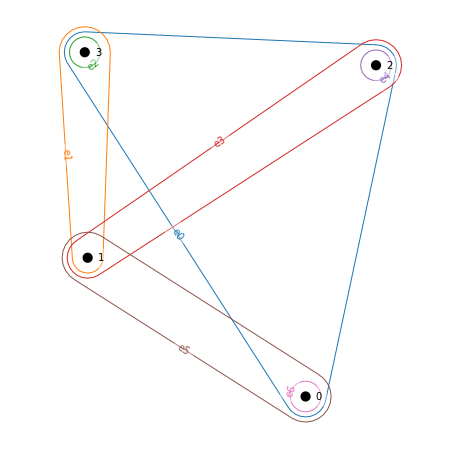

In [109]:
visualize_adj(get_adj(4, 7, 20211885))

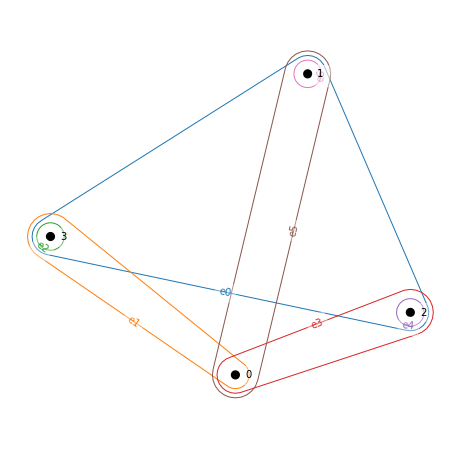

In [111]:
visualize_adj(get_adj(4, 7, 36984990))

## $n=5$

In [115]:
%%time
for m in range(2, 8):
    print('m=', m, get_max_num_wce(5, m))

m= 2 (1, '00000 00000 00000 00000 00000', [0])
m= 3 (1, '00000 00000 00000 00000 00000', [0])
m= 4 (2, '21100 12100 11200 00000 00000', [3238, 34951])
m= 5 (2, '21100 12100 11200 00000 00000', [3238, 34951])
m= 6 (6, '31111 13111 11311 11120 11102', [40187508, 72661620, 40219221, 105167445, 72725046, 105199158])
m= 7 (15, '31111 13111 11311 11131 11113', [1286000280, 2325171864, 1287015096, 3365358264, 2327201496, 3366373080, 1319520921, 3397864089, 3399893721, 2392213146])
CPU times: user 7min 5s, sys: 3.29 s, total: 7min 9s
Wall time: 7min 9s


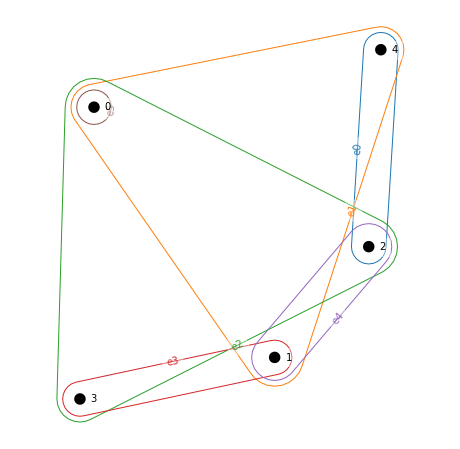

In [124]:
visualize_adj(get_adj(5, 6, 40187508))

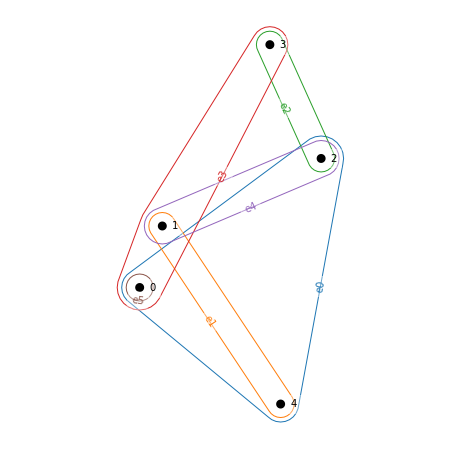

In [125]:
visualize_adj(get_adj(5, 6, 40219221))